In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('ResumeDataSet.csv')
df.head()

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."


## Data Exploration

In [3]:
df.isnull().sum()

Category    0
Resume      0
dtype: int64

In [4]:
print("Shape of the dataset : ",df.shape,"\n")
print(df.info())

Shape of the dataset :  (962, 2) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 962 entries, 0 to 961
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  962 non-null    object
 1   Resume    962 non-null    object
dtypes: object(2)
memory usage: 15.2+ KB
None


In [10]:
unique_categories = df['Category'].unique()
print("Unique Categories in the data set are \n\n",unique_categories)

Unique Categories in the data set are 

 ['Data Science' 'HR' 'Advocate' 'Arts' 'Web Designing'
 'Mechanical Engineer' 'Sales' 'Health and fitness' 'Civil Engineer'
 'Java Developer' 'Business Analyst' 'SAP Developer' 'Automation Testing'
 'Electrical Engineering' 'Operations Manager' 'Python Developer'
 'DevOps Engineer' 'Network Security Engineer' 'PMO' 'Database' 'Hadoop'
 'ETL Developer' 'DotNet Developer' 'Blockchain' 'Testing']


In [11]:
df['Category'].value_counts()

Category
Java Developer               84
Testing                      70
DevOps Engineer              55
Python Developer             48
Web Designing                45
HR                           44
Hadoop                       42
Blockchain                   40
ETL Developer                40
Operations Manager           40
Data Science                 40
Sales                        40
Mechanical Engineer          40
Arts                         36
Database                     33
Electrical Engineering       30
Health and fitness           30
PMO                          30
Business Analyst             28
DotNet Developer             28
Automation Testing           26
Network Security Engineer    25
SAP Developer                24
Civil Engineer               24
Advocate                     20
Name: count, dtype: int64

# Data Visualization

In [12]:
# Bar Chart

import plotly.express as px
import plotly.graph_objects as go

plot_data = pd.DataFrame({
    'Category': df['Category'].value_counts().index,
    'Count': df['Category'].value_counts().values
})

plot_data.head()

,Category,Count
0,Java Developer,84
1,Testing,70
2,DevOps Engineer,55
3,Python Developer,48
4,Web Designing,45


In [16]:
fig = px.bar(plot_data, x='Category', y='Count',
             color='Category', 
             labels={'Category': 'Job', 'Count': 'Count'},
             color_discrete_sequence=px.colors.qualitative.Set3)

fig.update_layout(
    title='Count of a particular Job',
    xaxis_title='Job Type',
    yaxis_title='Count',
    legend_title='Job Categories',
    showlegend=True,
    xaxis=dict(tickangle=-30),
    font=dict(family='Times New Roman', size=12),
    plot_bgcolor='white'
)

fig.show()

In [22]:
fig = px.bar(
    plot_data, 
    x='Category', 
    y='Count',
    color='Category',
    title='Job Category Count',
    labels={'Category': 'Job Type', 'Count': 'Count'} 
)

fig.update_xaxes(tickangle=-45)

fig.show()

In [28]:
# Pie Plot

fig = px.pie(plot_data, values='Count', names='Category',
             title='Job Category Count',
             color_discrete_sequence=px.colors.sequential.RdBu,
             hole=0.4,
             labels={'Category': 'Job Type', 'Count': 'Count'} ,
             opacity=0.8,
             )

fig.update_layout(
    legend_title='Categories',
    font=dict(family='Times New Roman', size=16, color='black'),
    plot_bgcolor='white',
    margin=dict(t=50, b=50, l=50, r=50)
)

fig.show()

# Data Processing

In [36]:
import re
from sklearn.preprocessing import LabelEncoder
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer 
import string
from sklearn.feature_extraction.text import TfidfVectorizer

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ydush\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ydush\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


# Data Cleaning                                  
1 Removing (URLs, hashtags, mentions, special letters, punctuations)

2 Tokenizing the cleaned text

3 Removing Stop Words

4 Performing Lemmatization on final text    

- The resumeKeywords function removes URLs, hashtags, mentions, special characters, non-ASCII characters, multiple spaces, and stop words from the input text while also performing tokenization, lowercasing, and lemmatization to provide cleaned and processed text as output.

- <b>Tokenization:</b> Tokenization is the process of breaking a text into individual words or tokens. In this step, the text is split into its constituent words, which makes it easier to analyze and process. For example, the sentence "I love coding" would be tokenized into three tokens: "I," "love," and "coding."

- <b> StopWords: </b> Stopwords are common words that are typically removed from text during natural language processing to improve text analysis and reduce noise in the data.Examples of common stopwords in English include "the," "and," "in," "is," "of," "it," "to," and many others. Removing stopwords from text helps reduce the dimensionality of the data and focuses the analysis on more meaningful words

- <b>Lemmatization:</b> Lemmatization is the process of reducing words to their base or root form. This step is essential for text analysis because it reduces different forms of a word to a common base form. For example, the words "running" and "ran" would both be lemmatized to "run." This simplifies the text and ensures that similar words are treated as the same, which is crucial for accurate analysis and modeling.

In [42]:

def resumeKeywords(text):   
    cleantext = re.sub('http\S+\s', ' ', text) # Removes URLs
    cleantext = re.sub('#\S+\s', ' ', cleantext) # Removes hashtags
    cleantext = re.sub('@\S+', '  ', cleantext)  # Removes mentions
    cleantext = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), ' ', cleantext) # Removes punctuations
    cleantext = re.sub(r'[^\x00-\x7f]', ' ', cleantext) # Removes non-ASCII characters
    cleantext = re.sub('\s+', ' ', cleantext) # Replace multiple spaces with a single space
    cleantext = cleantext.strip() # Removes leading and trailing whitespaces
    

    # Tokenizing our cleaned text
    tokenizer = nltk.tokenize.RegexpTokenizer('\w+')
    tokens = tokenizer.tokenize(cleantext)
    
    words = []
    for word in tokens:
        words.append(word.lower())


    # Removing Stop Words
    stopwords = nltk.corpus.stopwords.words('english')
    words_new = []
    for word in words:
        if word not in stopwords:
            words_new.append(word)

    # Performing Lemmatization
    wn = WordNetLemmatizer() 
    lemm_text = [wn.lemmatize(word) for word in words_new]
    
    # Converting List into String
    processed_text = ' '.join(lemm_text)
    
    return processed_text

<b>- Testing the above custom function to remove certain details from Resume</b>

In [43]:
# Testing the function resumeKeywords

resumeKeywords(''' Technology Services - http://tsrtechnologyservices.com
2. Vidarbha Merchants Urban Co-Op Bank - http://vmcbank.com
3. GISSS - http://gisss.co.in
4. Softtrust USA - http://softtrustusa.com
Roles and Responsibility
â Communicated with clients to understand their requirement
â Made mocks for the website
â Designed and developed complete website and hosted them in stipulated time.
company - www.jalloshband.com
description - Project Name:
1. Jallosh Band - www.jalloshband.com
2. An Endeavor Foundation
Roles and Responsibility:
â Communicated with clients to understand their requirement
â Made mocks for the website
â Designed and developed complete website and hosted them in stipulated time.
company - 10MagicalFingers
description - National and international client interaction.
â Management of digital data"
Web Designing,"Education Details 
 B.C.A Bachelor Computer Application Pune, Maharashtra Pune University
 H.S.C.  Pune, Maharashtra Pune University
 S.S.C.  Pune, Maharashtra Pune University
Web Designing and Developer ''')

'technology service 2 vidarbha merchant urban co op bank 3 gisss 4 softtrust usa role responsibility communicated client understand requirement made mock website designed developed complete website hosted stipulated time company www jalloshband com description project name 1 jallosh band www jalloshband com 2 endeavor foundation role responsibility communicated client understand requirement made mock website designed developed complete website hosted stipulated time company 10magicalfingers description national international client interaction management digital data web designing education detail b c bachelor computer application pune maharashtra pune university h c pune maharashtra pune university c pune maharashtra pune university web designing developer'

In [44]:
# Creating a new column named Clean_Resume

df['Clean_Resume'] = df['Resume'].apply(lambda x: resumeKeywords(x))
df.head()

,Category,Resume,Clean_Resume
0,Data Science,Skills * Programming Languages: Python (pandas...,skill programming language python panda numpy ...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...,education detail may 2013 may 2017 b e uit rgp...
2,Data Science,"Areas of Interest Deep Learning, Control Syste...",area interest deep learning control system des...
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,skill r python sap hana tableau sap hana sql s...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab...",education detail mca ymcaust faridabad haryana...


## Visualizing the cleaned text through wordcloud

In [46]:
from wordcloud import WordCloud

text = ' '.join(df['Clean_Resume'])

wordcloud = WordCloud(background_color='white',
                      width=800,
                      height=600,
                      max_words=100,
                      colormap='viridis'
                      ).generate(text)

wordcloud_image = wordcloud.to_image()


fig = px.imshow(wordcloud_image)
fig.update_layout(
    title='Word Cloud of Cleaned Text',
    xaxis_showticklabels=False,
    yaxis_showticklabels=False,
    plot_bgcolor='white'
)
fig.show()

In [47]:
# Label encoding our Category

label = LabelEncoder()
df['Encoded_Category'] = label.fit_transform(df['Category'])
df.head()

,Category,Resume,Clean_Resume,Encoded_Category
0,Data Science,Skills * Programming Languages: Python (pandas...,skill programming language python panda numpy ...,6
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...,education detail may 2013 may 2017 b e uit rgp...,6
2,Data Science,"Areas of Interest Deep Learning, Control Syste...",area interest deep learning control system des...,6
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,skill r python sap hana tableau sap hana sql s...,6
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab...",education detail mca ymcaust faridabad haryana...,6


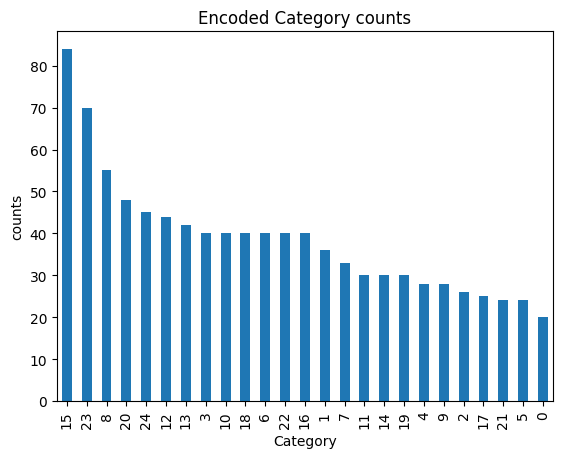

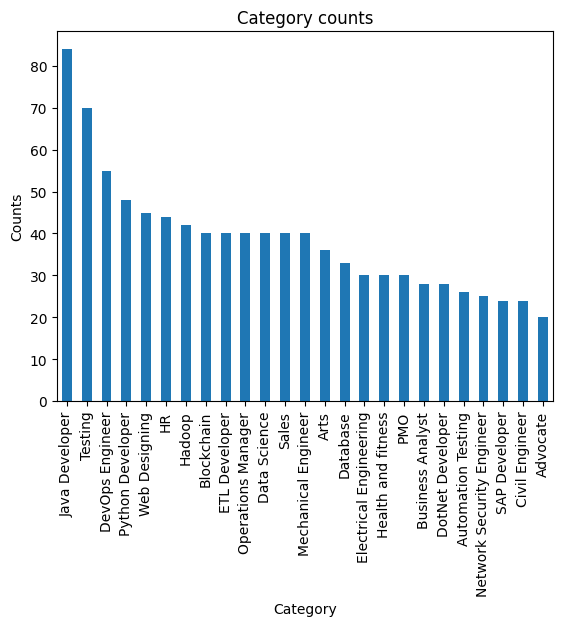

In [48]:
# Creating the bar plot
df['Encoded_Category'].value_counts().plot(kind = 'bar', title='Encoded Category counts', xlabel='Category', ylabel='counts')
plt.show()
df['Category'].value_counts().plot(kind = 'bar', title='Category counts', xlabel='Category', ylabel='Counts')
plt.show()

In [50]:
# Create the mapping
category_mapping = df.groupby('Encoded_Category')['Category'].first().to_dict()

# Print the created mapping
print("Created Category Mapping:")
print(category_mapping)

Created Category Mapping:
{0: 'Advocate', 1: 'Arts', 2: 'Automation Testing', 3: 'Blockchain', 4: 'Business Analyst', 5: 'Civil Engineer', 6: 'Data Science', 7: 'Database', 8: 'DevOps Engineer', 9: 'DotNet Developer', 10: 'ETL Developer', 11: 'Electrical Engineering', 12: 'HR', 13: 'Hadoop', 14: 'Health and fitness', 15: 'Java Developer', 16: 'Mechanical Engineer', 17: 'Network Security Engineer', 18: 'Operations Manager', 19: 'PMO', 20: 'Python Developer', 21: 'SAP Developer', 22: 'Sales', 23: 'Testing', 24: 'Web Designing'}


# Vectorization

In [51]:
# Vectorization through TfidfVectorizer

from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(stop_words='english')

tfidf.fit(df['Clean_Resume'])
requiredText  = tfidf.transform(df['Clean_Resume'])
print(requiredText)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 155341 stored elements and shape (962, 6562)>
  Coords	Values
  (0, 118)	0.06453783899846323
  (0, 268)	0.04632697838273315
  (0, 298)	0.031126979945512483
  (0, 317)	0.025361912989866155
  (0, 340)	0.033319272390464866
  (0, 370)	0.029288428444891598
  (0, 495)	0.13903194496767213
  (0, 497)	0.07851286854091813
  (0, 500)	0.15656008367123686
  (0, 505)	0.02096423266463051
  (0, 512)	0.026190077390818307
  (0, 523)	0.04632697838273315
  (0, 526)	0.03727134831379874
  (0, 622)	0.04632697838273315
  (0, 640)	0.053810183291968954
  (0, 643)	0.08098518487138881
  (0, 645)	0.02899820504264113
  (0, 646)	0.06518168127424176
  (0, 650)	0.10712314267369262
  (0, 667)	0.03771995525102985
  (0, 700)	0.027461726023211917
  (0, 703)	0.03503454597093106
  (0, 786)	0.015483241225769256
  (0, 796)	0.08098518487138881
  (0, 829)	0.024012779374943182
  :	:
  (961, 5265)	0.040106642718727006
  (961, 5313)	0.034685407248807254
  (961, 5323)	0.

# Model Creation

In [52]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(requiredText, df['Encoded_Category'], test_size=0.2, random_state=1)
print(X_train.shape)

print(X_test.shape)

(769, 6562)
(193, 6562)


In [54]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

In [55]:
# Multinomial Classifier

mnb = MultinomialNB()
mnb.fit(X_train,y_train)
y_pred1 = mnb.predict(X_test)
print('Accuracy: ', accuracy_score(y_test,y_pred1)*100, ' % \n')
print(classification_report(y_test, y_pred1))

Accuracy:  93.78238341968913  % 

              precision    recall  f1-score   support

           0       1.00      0.25      0.40         4
           1       1.00      1.00      1.00         6
           2       1.00      0.60      0.75         5
           3       1.00      1.00      1.00        13
           4       1.00      1.00      1.00         6
           5       1.00      1.00      1.00         7
           6       1.00      0.89      0.94         9
           7       1.00      1.00      1.00         5
           8       1.00      0.90      0.95        10
           9       1.00      1.00      1.00         4
          10       1.00      1.00      1.00         9
          11       1.00      1.00      1.00         7
          12       1.00      0.90      0.95        10
          13       1.00      1.00      1.00         3
          14       1.00      1.00      1.00         4
          15       0.70      1.00      0.82        14
          16       1.00      1.00      1.00    

In [56]:
# KNeighborsClassifier

knc = OneVsRestClassifier(KNeighborsClassifier())
knc.fit(X_train,y_train)
y_pred2 = knc.predict(X_test)
print('Accuracy: ', accuracy_score(y_test,y_pred2)*100, ' %')
print(classification_report(y_test, y_pred2))

Accuracy:  98.44559585492227  %
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00         6
           2       0.83      1.00      0.91         5
           3       1.00      1.00      1.00        13
           4       1.00      1.00      1.00         6
           5       1.00      1.00      1.00         7
           6       1.00      0.78      0.88         9
           7       1.00      1.00      1.00         5
           8       1.00      0.90      0.95        10
           9       1.00      1.00      1.00         4
          10       1.00      1.00      1.00         9
          11       1.00      1.00      1.00         7
          12       1.00      1.00      1.00        10
          13       1.00      1.00      1.00         3
          14       1.00      1.00      1.00         4
          15       1.00      1.00      1.00        14
          16       1.00      1.00      1.00      

# RNN

In [60]:
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense, SpatialDropout1D
from keras.preprocessing.text import Tokenizer
from keras.utils import pad_sequences

In [59]:
# maximum number of words to consider
max_words = 5000

tokenizer = Tokenizer(num_words=max_words, split=' ')
tokenizer.fit_on_texts(df['Clean_Resume'])
X = tokenizer.texts_to_sequences(df['Clean_Resume'])
X = pad_sequences(X, maxlen=100)


X_train, X_test, y_train, y_test = train_test_split(X, df['Encoded_Category'], test_size=0.20, random_state=1)

model = Sequential()
model.add(Embedding(input_dim=max_words, output_dim=128, input_length=100))
model.add(SpatialDropout1D(0.2))
model.add(LSTM(100))
model.add(Dense(32, activation='relu'))
model.add(Dense(len(label.classes_), activation='softmax'))
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, batch_size=64)

Epoch 1/50
13/13 [==============================] - 5s 167ms/step - loss: 3.1987 - accuracy: 0.1743 - val_loss: 3.1616 - val_accuracy: 0.1917
Epoch 2/50
13/13 [==============================] - 2s 140ms/step - loss: 3.0390 - accuracy: 0.1977 - val_loss: 2.9309 - val_accuracy: 0.0829
Epoch 3/50
13/13 [==============================] - 2s 127ms/step - loss: 2.5819 - accuracy: 0.1990 - val_loss: 2.5593 - val_accuracy: 0.1399
Epoch 4/50
13/13 [==============================] - 2s 124ms/step - loss: 2.4281 - accuracy: 0.1730 - val_loss: 2.3902 - val_accuracy: 0.2953
Epoch 5/50
13/13 [==============================] - 2s 140ms/step - loss: 2.1608 - accuracy: 0.3823 - val_loss: 2.1654 - val_accuracy: 0.3316
Epoch 6/50
13/13 [==============================] - 2s 129ms/step - loss: 1.8951 - accuracy: 0.4083 - val_loss: 1.9481 - val_accuracy: 0.4508
Epoch 7/50
13/13 [==============================] - 2s 125ms/step - loss: 1.6506 - accuracy: 0.5072 - val_loss: 1.7058 - val_accuracy: 0.4767
Epoch 

In [61]:
y_pred_rnn_prob = model.predict(X_test)
y_pred3 = y_pred_rnn_prob.argmax(axis=-1)
accuracy_rnn = accuracy_score(y_test, y_pred3)
print('RNN Model Accuracy: {:.2f}%'.format(accuracy_rnn * 100))
print(classification_report(y_test, y_pred3))

7/7 [==============================] - 1s 19ms/step
RNN Model Accuracy: 98.45%
              precision    recall  f1-score   support

           0       1.00      0.50      0.67         4
           1       1.00      1.00      1.00         6
           2       1.00      1.00      1.00         5
           3       1.00      1.00      1.00        13
           4       1.00      1.00      1.00         6
           5       1.00      1.00      1.00         7
           6       0.90      1.00      0.95         9
           7       1.00      1.00      1.00         5
           8       1.00      0.90      0.95        10
           9       1.00      1.00      1.00         4
          10       1.00      1.00      1.00         9
          11       1.00      1.00      1.00         7
          12       1.00      1.00      1.00        10
          13       1.00      1.00      1.00         3
          14       1.00      1.00      1.00         4
          15       1.00      1.00      1.00        14
  

# <b>Prediction System</b>

#### <b>Saving the created models</b>

In [78]:
import pickle
pickle.dump(tfidf,open('tfidf.pkl','wb'))
pickle.dump(mnb, open('mnb.pkl', 'wb'))
pickle.dump(tokenizer, open('rnn_tokenizer.pkl','wb'))
pickle.dump(model, open('rnn.pkl', 'wb'))
model.save('rnn.h5')

INFO:tensorflow:Assets written to: ram://b4acce27-fe58-47aa-b4fd-6698486a9e24/assets


INFO:tensorflow:Assets written to: ram://b4acce27-fe58-47aa-b4fd-6698486a9e24/assets


In [79]:
resume_1 = """"SKILLS: â¢ Knowledge of software / computer: Auto CAD (Included Diploma Academic Syllabus) â¢ MSCIT â¢ CNC Programming (Fanuc Series) - milling STRENGTHS: â¢ Strong Dedication towards work. â¢ Quick Learner. â¢ Positive thinking and self-confidence. â¢ Honest, discipline and hardworking. INDUSTRIAL EXPERIENCE: â¢ 10 Day's Industrial Training at Nagpur agro Components, Hingna Road, Nagpur. â¢ 10 Day's Industrial Training at METAL FAB High-tech Pvt. Ltd, Hingna Road, Nagpur. EXTRA CRICULUM ACTIVITY: Education Details 
 B.E   RTMNU
Mechanical engineering 


Skill Details 
AUTO CAD- Exprience - 6 months
AUTOMOTIVE- Exprience - 6 months
AUTOMOTIVE CNC- Exprience - 6 months
CAD- Exprience - 6 months
CNC- Exprience - 6 monthsCompany Details 
company - Tata motors, adani, maruti suzuki,jet airways. Air india.
description - 1. I am student of mechanical engineering in the final year. I'm fresher so don't have any experiance in industry.
2. But in 3 rd year the industrial training program conducted by the so 10 days training experiance in the industry.
3. In the 5 th semister the 10 days working in Nagpur Agro Components. While the working all the machine and CNC machine i have seen in industry.
4. In 6 th semister another training program in Metal fab company.
company - No
description - English, Hindi, Marathi

â¢ Participate in JSW Urja Project Competition 2017-2018
â¢ Machine Assembly Disassembly and Functioning of parts (1 Weeks)

FINAL YEAR PROJECT:

â¢ Design nd fabrication of Pneumatic Punching Machine - in BE
â¢ Paddle operated Sugarcane Juicer machine - in Diploma Engineering."
"""

#### <b> Predicting Resume-1 by KNearestClassifier model</b>

In [80]:
import pickle

# Load the trained KNearest classifier model
clf = pickle.load(open('knc.pkl', 'rb'))

# Clean the input resume
cleaned_resume = resumeKeywords(resume_1)

# Transform the cleaned resume using the trained TfidfVectorizer
input_features = tfidf.transform([cleaned_resume])

# Make the prediction using the loaded classifier
prediction_id = clf.predict(input_features)[0]

category_name = category_mapping.get(prediction_id, "Unknown")

print("Predicted Category:", category_name)
print(prediction_id)


Predicted Category: Mechanical Engineer
16


#### <b> Predicting Resume-1 by Multinomial Naive Bayes model</b>

In [81]:
import pickle

# Load the trained  Multinomial Naive Bayes model
mnb = pickle.load(open('mnb.pkl', 'rb'))

# Clean the input resume
cleaned_resume = resumeKeywords(resume_1)

# Transform the cleaned resume using the trained TfidfVectorizer
input_features = tfidf.transform([cleaned_resume])

# Make the prediction using the loaded classifier
prediction_id = mnb.predict(input_features)[0]

category_name = category_mapping.get(prediction_id, "Unknown")

print("Predicted Category:", category_name)
print(prediction_id)

Predicted Category: Mechanical Engineer
16


#### <b> Predicting Resume-1 by RNN model</b>

In [82]:
import pickle
from tensorflow import keras
from keras.utils import pad_sequences

# rnn = pickle.load(open('rnn.pkl', 'rb'))
rnn = keras.models.load_model('rnn.h5')
rnn_tokenizer = pickle.load(open('rnn_tokenizer.pkl', 'rb'))
# Define the maximum number of words to consider
max_words = 5000
cleaned_resume = resumeKeywords(resume_1)  # Clean the input resume

# Tokenize the cleaned input resume
input_sequence = rnn_tokenizer.texts_to_sequences([cleaned_resume])
# Padding the sequences
input_sequence = pad_sequences(input_sequence, maxlen=100)

# Make the prediction using the loaded RNN model
predicted_probabilities = rnn.predict(input_sequence)

prediction_id = predicted_probabilities.argmax(axis=-1)
# Map the category ID to the category name using category_mapping
category_name = category_mapping.get(prediction_id[0], "Unknown")

print("Predicted Category:", category_name)
print("Predicted Category ID:", prediction_id[0])


1/1 [==============================] - 0s 496ms/step
Predicted Category: Mechanical Engineer
Predicted Category ID: 16


In [83]:
job_description_1="""
About the job
Join a top employer and advance your career. Aplin has partnered with an Edmonton-based company to hire a Data Scientist. 

In this exciting role, you will serve as the catalyst for data-driven decision-making, guiding our client toward unparalleled success in lead conversion, customer loyalty, predictive innovation, and inventory optimization. 

Responsibilities:
Dive deep into datasets to unveil the untapped potential in enhancing lead conversion rates.
Develop cutting-edge algorithms that predict customer preferences.
Pioneer loyalty programs that exert a magnetic influence, guaranteeing a continuous stream of returning customers.
Optimize inventory with precision, ensuring the right products are available at the right time.
Qualifications:
Bachelor's degree in Computer Science, Statistics, Applied Math, or related fields; a Master's or PhD will give your credentials an extra boost.
Proficiency in SQL, Python, R, or any other data manipulation language.
Hands-on experience in machine learning, predictive analytics, and various statistical modeling techniques.
Exceptional attention to detail, capable of identifying outliers in datasets with precision.
A passion for storytelling through data, recognizing the importance of context in making impactful decisions.
Outstanding collaboration skills to navigate seamlessly within teams, ensuring smooth progress on your journey.

"""

In [84]:
job_description_1="""
My technical skills include proficiency in
Python, Sklearn, TensorFlow, and PyTorch.
What sets me apart is my ability to effectively
communicate complex concepts to diverse
audiences. I excel in translating technical insights
into actionable recommendations that drive
informed decision-making.

ABOUT ME
WORK EXPERIENCE
SKILLES
NOOR SAEED
LANGUAGES
English
Urdu
Hindi
I am a versatile data scientist with expertise in a wide
range of projects, including machine learning,
recommendation systems, deep learning, and computer
vision. Throughout my career, I have successfully
developed and deployed various machine learning models
to solve complex problems and drive data-driven
decision-making
Machine Learnine
Deep Learning
Computer Vision
Recommendation Systems
Data Visualization
Programming Languages (Python, SQL)
Data Preprocessing and Feature Engineering
Model Evaluation and Deployment
Statistical Analysis
Communication and Collaboration
"""

In [85]:
job_description_1 = """
LMI is seeking a Software Developer or computer science graduate with 7+ years of proven experience in computer vision who has the desire and skill set to design machine vision sensors. You will work in a multi-disciplinary, multi-platform, engineering team (software, electrical, mechanical/optical) that develops new sensor products and supporting infrastructure (manufacturing and test equipment). The ideal candidate will have a passion for leading-edge technology, extensive experience developing production-ready software, strong critical thinking and problem-solving skills, and can work well autonomously yet still communicate effectively with a close-knit group of about 10 engineers. Previous leadership or project management experience is an asset as there is an opportunity to lead a team in this role.

This Senior Software Developer will work in the R&D team and report to the Software Engineering Manager.

Design and develop 3D acquisition algorithms for our sensors to produce 3D data from images
Develop components of our calibration and acquisition pipeline
Characterize and validate prototype sensor performance and integrate final designs with customers
Investigate solutions for challenging acquisition problems. Investigate improvements to our algorithms to enhance the performance of our sensors
Design and develop manufacturing software tools required to build the sensors and control key component performance (e.g. software tasks for focusing and aligning cameras/lasers/projectors, quantifying and adjusting sensor sensitivity, etc.)
Lead technical investigations and produce reports and documentation for senior management
Demonstrate leadership and ownership. Drive projects to completion, participate in frequent peer design and code reviews, and use your expertise to oversee and mentor others in the team
Proactively contribute to and implement continuous improvement initiatives
What do you need to be successful?

Degree / Diploma in Computer Science, Electrical/Computer Engineering or equivalent
5+ years work experience in a disciplined software development environment producing deliverable code
Solid knowledge of C/C++ and C# programming using Microsoft Visual Studio
Expertise in 3D metrology or computer vision (object detection, image restoration, scene reconstruction, signal processing, etc., but excluding machine learning) is required
Experience independently planning and completing complex projects/deliverables in a reliable time frame
Proficient with commonly used scripting languages like Python
Excellent understanding of object-oriented programming
Excellent understanding of commonly used data structures and algorithms (lists, trees, sorting, binning, etc.)
Excellent understanding of math and statistics
Excellent written and verbal communication
Solid understanding of memory management, threading/synchronization, networking
Previous scrum master experience or experience overseeing a small team is an asset
Experience developing for a manufacturing automation environment is an asset
Salary Range: $106,000 - $132,500 - $151,000

Expected Salary: Our typical hiring range will be +/- 10% of the midpoint listed above. Factors influencing this decision include qualifications and market conditions for the role.
"""

# Keywords extraction from provided Job Description and Resume

In [86]:
from sklearn.metrics.pairwise import cosine_similarity
cleaned_resume = resumeKeywords(resume_1)
cleaned_job_description = resumeKeywords(job_description_1)
vectors_1  = tfidf.transform([cleaned_resume])
vectors_2 = tfidf.transform([cleaned_job_description])
similarity_score = cosine_similarity(vectors_1,vectors_2)
print("Similarity Score:", similarity_score)


Similarity Score: [[0.08925483]]


# Bulding Job Category Recommendation System for this dataset

In [87]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_1 = TfidfVectorizer(stop_words='english',max_features=500)

tfidf_1.fit(df['Clean_Resume'][0:5000])
requiredText  = tfidf_1.transform(df['Clean_Resume'][0:5000])
print(requiredText)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 74987 stored elements and shape (962, 500)>
  Coords	Values
  (0, 14)	0.11840360219295874
  (0, 19)	0.04652994124231601
  (0, 25)	0.2550733547873763
  (0, 27)	0.28723115235926744
  (0, 29)	0.03846178773916878
  (0, 31)	0.04804932351173231
  (0, 40)	0.05038233901296002
  (0, 47)	0.028406149992057456
  (0, 50)	0.0440547688112978
  (0, 55)	0.04996458719837494
  (0, 59)	0.07605603441123704
  (0, 63)	0.07150709512498088
  (0, 70)	0.05007287107864106
  (0, 71)	0.05038233901296002
  (0, 72)	0.05195485584236916
  (0, 76)	0.05937465818575072
  (0, 80)	0.013575862747900163
  (0, 85)	0.026896166035753028
  (0, 97)	0.03568152690154968
  (0, 99)	0.045163618549866225
  (0, 102)	0.12453963183325915
  (0, 107)	0.08461735388598048
  (0, 109)	0.0824169436890886
  (0, 111)	0.14634999806057375
  (0, 112)	0.2736080384269553
  :	:
  (961, 358)	0.1201836986931062
  (961, 364)	0.0327113401255411
  (961, 370)	0.040841179529759235
  (961, 379)	0.0337

In [88]:
vectors = requiredText.toarray()
print(vectors.shape)
print(vectors[0])

(962, 500)
[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.1184036  0.         0.         0.
 0.         0.04652994 0.         0.         0.         0.
 0.         0.25507335 0.         0.28723115 0.         0.03846179
 0.         0.04804932 0.         0.         0.         0.
 0.         0.         0.         0.         0.05038234 0.
 0.         0.         0.         0.         0.         0.02840615
 0.         0.         0.04405477 0.         0.         0.
 0.         0.04996459 0.         0.         0.         0.07605603
 0.         0.         0.         0.0715071  0.         0.
 0.         0.         0.         0.         0.05007287 0.05038234
 0.05195486 0.         0.         0.         0.05937466 0.
 0.         0.         0.01357586 0.         0.         0.
 0.         0.02689617 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0

In [89]:
vectors

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.02396493],
       [0.        , 0.11056736, 0.        , ..., 0.        , 0.        ,
        0.40667888],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.41077046],
       ...,
       [0.02572716, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.09660559],
       [0.16587966, 0.        , 0.        , ..., 0.        , 0.24750229,
        0.        ]])

In [90]:
len(tfidf_1.get_feature_names_out())

500

In [91]:
print(tfidf_1.get_feature_names_out())

['10' '12' '15' '20' '2008' '2010' '2011' '2012' '2013' '2014' '2015'
 '2016' '2017' '2018' '24' '48' 'ability' 'access' 'account' 'action'
 'activity' 'administration' 'administrator' 'agile' 'ajax' 'analysis'
 'analyst' 'analytics' 'analyze' 'analyzing' 'android' 'angular' 'api'
 'application' 'architecture' 'area' 'art' 'asp' 'attending' 'audit'
 'automated' 'automation' 'aws' 'bachelor' 'backup' 'bank' 'banking'
 'based' 'basic' 'basis' 'best' 'billing' 'blockchain' 'bo' 'board'
 'bootstrap' 'branch' 'budget' 'bug' 'build' 'building' 'business' 'card'
 'case' 'center' 'certificate' 'change' 'check' 'cisco' 'civil' 'client'
 'cloud' 'cluster' 'code' 'college' 'com' 'comment' 'commerce'
 'commercial' 'communication' 'company' 'complete' 'completed'
 'compliance' 'component' 'computer' 'conducted' 'configuration'
 'construction' 'consultancy' 'consultant' 'contract' 'contribution'
 'control' 'controller' 'coordinate' 'coordinating' 'core' 'corporate'
 'cost' 'course' 'create' 'created

In [92]:
print(tfidf_1.get_feature_names_out()[40])
print(tfidf_1.get_feature_names_out()[20])
print(tfidf_1.get_feature_names_out()[11])
print(tfidf_1.get_feature_names_out()[22])
print(tfidf_1.get_feature_names_out()[33])
print(tfidf_1.get_feature_names_out()[44])

automated
activity
2016
administrator
application
backup


### Similarity Score (Cosine similarity method)
- For recommending the similar job category we need to identify the nearest vectors of a particular job category vector.
- In order to find out the nearest vectors, we use similarity score and it has two methods (1- Euclidean distance method) & (2- Cosine similarity method)
- Here, I will be using cosine similarity method rather than euclidean distance method because euclidean distance does not perform well on higher dimensions
- The similarity is inverse of distance. [0-1]
- If 1 then similarity is high and if 0 then similarity is low

In [93]:
from sklearn.metrics.pairwise import cosine_similarity
similarity = cosine_similarity(vectors)
# This will create result with values as distance/similarity between each vectors
print(similarity)

[[1.         0.21148385 0.28948284 ... 0.04255453 0.0683294  0.09374585]
 [0.21148385 1.         0.50844088 ... 0.01732533 0.18809417 0.10409007]
 [0.28948284 0.50844088 1.         ... 0.03952149 0.28214179 0.19174322]
 ...
 [0.04255453 0.01732533 0.03952149 ... 1.         0.12282746 0.24562413]
 [0.0683294  0.18809417 0.28214179 ... 0.12282746 1.         0.18933751]
 [0.09374585 0.10409007 0.19174322 ... 0.24562413 0.18933751 1.        ]]


In [94]:
print(similarity.shape)
# It finds out distance of each job with every job, and that is the reason why the shape of the similarity shape is (5000,5000)
print(similarity[0])
# Gives similarity score of first job with every job, it can also be seen that the first value is 1 which indicates that the value is the
# similarity score of first job with itself.
print(similarity[1])

(962, 962)
[1.         0.21148385 0.28948284 0.3186018  0.24324377 0.22698037
 0.39980916 0.37560754 0.32004228 0.4399432  1.         0.21148385
 0.28948284 0.3186018  0.24324377 0.22698037 0.39980916 0.37560754
 0.32004228 0.4399432  1.         0.21148385 0.28948284 0.3186018
 0.24324377 0.22698037 0.39980916 0.37560754 0.32004228 0.4399432
 1.         0.21148385 0.28948284 0.3186018  0.24324377 0.22698037
 0.39980916 0.37560754 0.32004228 0.4399432  0.01804888 0.10764851
 0.03075593 0.01698605 0.01698605 0.02553573 0.01117892 0.04609305
 0.00803632 0.04988248 0.12621074 0.01804888 0.10764851 0.03075593
 0.01698605 0.01698605 0.02553573 0.01117892 0.04609305 0.00803632
 0.04988248 0.12621074 0.01804888 0.10764851 0.03075593 0.01698605
 0.01698605 0.02553573 0.01117892 0.04609305 0.00803632 0.04988248
 0.12621074 0.01804888 0.10764851 0.03075593 0.01698605 0.01698605
 0.02553573 0.01117892 0.04609305 0.00803632 0.04988248 0.12621074
 0.02942847 0.05210703 0.05583657 0.09580663 0.114403

In [95]:
df2 = df
df2 = df2[['Category','Resume','Clean_Resume','Encoded_Category']][0:5000]
df2.head()

,Category,Resume,Clean_Resume,Encoded_Category
0,Data Science,Skills * Programming Languages: Python (pandas...,skill programming language python panda numpy ...,6
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...,education detail may 2013 may 2017 b e uit rgp...,6
2,Data Science,"Areas of Interest Deep Learning, Control Syste...",area interest deep learning control system des...,6
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,skill r python sap hana tableau sap hana sql s...,6
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab...",education detail mca ymcaust faridabad haryana...,6


In [96]:
df2['Encoded_Category'].value_counts()

Encoded_Category
15    84
23    70
8     55
20    48
24    45
12    44
13    42
3     40
10    40
18    40
6     40
22    40
16    40
1     36
7     33
11    30
14    30
19    30
4     28
9     28
2     26
17    25
21    24
5     24
0     20
Name: count, dtype: int64

### Creating function which will recommend top 5 job categories based on the predicted job category 

1) Initially, if the predicted job category id is given, I will need to find out the index of that job category in my dataset
2) Based on index value, I will be able to know the list of similarity scores of that particular job category with every job category
3) Using Enumerate function to align index and values together while sorting the similarity score in descending order to get top-5 job category

1) Based on given predicted job category id getting the index of that job category in my dataset 

In [97]:
print(df2[df2['Encoded_Category'] == 0].index[0])
print(df2[df2['Encoded_Category'] == 15].index[0])
print(df2[df2['Encoded_Category'] == 20].index[0])

84
319
551


2) Based on the fetched index getting the similarity score list of that job

3) Now as I need the top 5 similar job categories I will need to sort the data in descending order to get top-5.
- However, there is a problem if I am sorting, the index position is getting lost. So, to solve this problem I am using enumerate function (which prints index with value)
- Applying lambda function in that to sort in descending order according to the similarity score and not based on the index value.


In [98]:
# 2.------------------------------- 
print(similarity[0])
print(similarity[38]) 
print(similarity[26]) 
# 3.------------------------------- 
print("-------------------------------------------------------------------------------------------------------------------------------------")
print(list(enumerate(similarity[0]))) 
print(list(enumerate(similarity[38]))) 
print(list(enumerate(similarity[26]))) 
print("-------------------------------------------------------------------------------------------------------------------------------------")
print(sorted(list(enumerate(similarity[0])),reverse = True, key=lambda x:x[1])) 
print(sorted(list(enumerate(similarity[38])),reverse = True, key=lambda x:x[1])) 
print(sorted(list(enumerate(similarity[26])),reverse = True, key=lambda x:x[1])) 

[1.         0.21148385 0.28948284 0.3186018  0.24324377 0.22698037
 0.39980916 0.37560754 0.32004228 0.4399432  1.         0.21148385
 0.28948284 0.3186018  0.24324377 0.22698037 0.39980916 0.37560754
 0.32004228 0.4399432  1.         0.21148385 0.28948284 0.3186018
 0.24324377 0.22698037 0.39980916 0.37560754 0.32004228 0.4399432
 1.         0.21148385 0.28948284 0.3186018  0.24324377 0.22698037
 0.39980916 0.37560754 0.32004228 0.4399432  0.01804888 0.10764851
 0.03075593 0.01698605 0.01698605 0.02553573 0.01117892 0.04609305
 0.00803632 0.04988248 0.12621074 0.01804888 0.10764851 0.03075593
 0.01698605 0.01698605 0.02553573 0.01117892 0.04609305 0.00803632
 0.04988248 0.12621074 0.01804888 0.10764851 0.03075593 0.01698605
 0.01698605 0.02553573 0.01117892 0.04609305 0.00803632 0.04988248
 0.12621074 0.01804888 0.10764851 0.03075593 0.01698605 0.01698605
 0.02553573 0.01117892 0.04609305 0.00803632 0.04988248 0.12621074
 0.02942847 0.05210703 0.05583657 0.09580663 0.11440393 0.006751

- Final Custom function

In [99]:
def recommend(category):
    #Based on given predicted job category id getting the index of that job category in my dataset 
    index = df2[df2['Encoded_Category'] == category].index[0] 

    #Based on the fetched index getting the similarity score list of that job
    distances = sorted(list(enumerate(similarity[index])), reverse=True, key=lambda x: x[1]) 
    # print(distances) # For testing purpose
    
    unique_set = set([])
    similarity_score = []
    
    for i in distances[0:100]: 
        if len(unique_set) < 5:
            job = df2.iloc[i[0]].Category
            score = "{:.2f}".format(i[1])
            if job not in unique_set and score != "1.00":
                unique_set.add(job)
                similarity_score.append(i[1])
                print(f"{job}, {score}") # Print each unique value and its corresponding similarity score
        else:
            break

In [100]:
print(category_mapping.get(0))
recommend(0)

Advocate
Civil Engineer, 0.42
Advocate, 0.33
Health and fitness, 0.28
Business Analyst, 0.19
Database, 0.17


In [101]:
print(category_mapping.get(16))
recommend(16)

Mechanical Engineer
Operations Manager, 0.36
DevOps Engineer, 0.34
Business Analyst, 0.33
Electrical Engineering, 0.30
Civil Engineer, 0.29


In [102]:
print(category_mapping.get(16))
recommend(16)

Mechanical Engineer
Operations Manager, 0.36
DevOps Engineer, 0.34
Business Analyst, 0.33
Electrical Engineering, 0.30
Civil Engineer, 0.29
